In [ ]:
import cv2
import pickle

width, height = 107, 48

try:
    with open('CarParkPos', 'rb') as f:
        posList = pickle.load(f)
except:
    posList = []


def mouseClick(events, x, y, flags, params):
    if events == cv2.EVENT_LBUTTONDOWN:
        posList.append((x, y))
    if events == cv2.EVENT_RBUTTONDOWN:
        for i, pos in enumerate(posList):
            x1, y1 = pos
            if x1 < x < x1 + width and y1 < y < y1 + height:
                posList.pop(i)

    with open('CarParkPos', 'wb') as f:
        pickle.dump(posList, f)


while True:
    img = cv2.imread('carParkImg.png')
    for pos in posList:
        cv2.rectangle(img, pos, (pos[0] + width, pos[1] + height), (179,95,5), 2)

    cv2.imshow("Image", img)
    cv2.setMouseCallback("Image", mouseClick)
    cv2.waitKey(1)

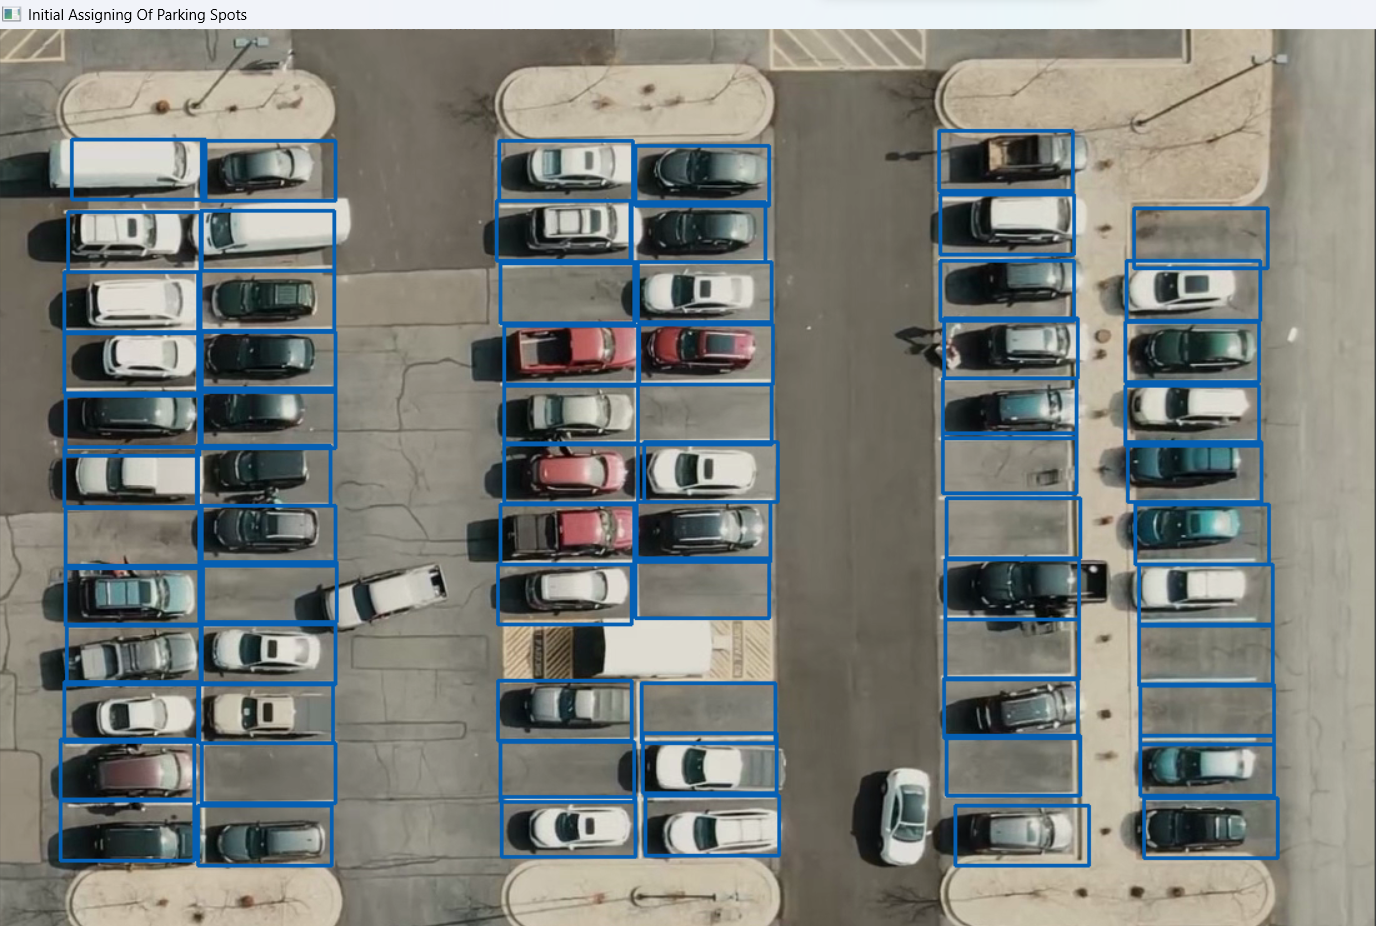

In [ ]:
import cv2
import pickle
import cvzone
import numpy as np

# Video feed
cap = cv2.VideoCapture('carPark.mp4')

with open('CarParkPos', 'rb') as f:
        posList = pickle.load(f)


width, height = 107, 48


def checkParkingSpace():
    spaceCounter = 0

    for pos in posList:
        x, y = pos
        cv2.rectangle(img, pos, (pos[0] + width, pos[1] + height), (179,95,5), 2)

        imgCrop = img[y:y + height, x:x + width]
        cv2.imshow(str(x * y), imgCrop)

while True:

    if cap.get(cv2.CAP_PROP_POS_FRAMES) == cap.get(cv2.CAP_PROP_FRAME_COUNT):
        cap.set(cv2.CAP_PROP_POS_FRAMES, 0)

    success,img=cap.read()

    checkParkingSpace()
    cv2.imshow("Image", img)
    # cv2.imshow("ImageBlur", imgBlur)
    # cv2.imshow("ImageThres", imgMedian)
    cv2.waitKey(10)


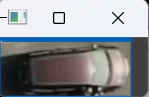

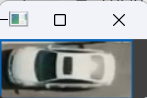

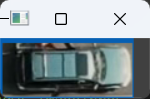

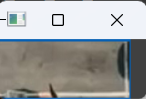

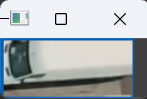

In [ ]:
import cv2
import pickle
import cvzone
import numpy as np

# Video feed
cap = cv2.VideoCapture('carPark.mp4')

with open('CarParkPos', 'rb') as f:
    posList = pickle.load(f)

width, height = 107, 48


def checkParkingSpace(imgPro):
    spaceCounter = 0

    for pos in posList:
        x, y = pos

        imgCrop = imgPro[y:y + height, x:x + width]
        cv2.imshow(str(x * y), imgCrop)
        count = cv2.countNonZero(imgCrop)


        if count < 900:
            color = (0, 255, 0)
            thickness = 5
            spaceCounter += 1
        else:
            color = (0, 0, 255)
            thickness = 2

        cv2.rectangle(img, pos, (pos[0] + width, pos[1] + height), color, thickness)
        cvzone.putTextRect(img, str(count), (x, y + height - 3), scale=1,
                           thickness=2, offset=0, colorR=color)

    cvzone.putTextRect(img, f'Free: {spaceCounter}/{len(posList)}', (100, 50), scale=3,
                           thickness=5, offset=20, colorR=(0,200,0))
while True:

    if cap.get(cv2.CAP_PROP_POS_FRAMES) == cap.get(cv2.CAP_PROP_FRAME_COUNT):
        cap.set(cv2.CAP_PROP_POS_FRAMES, 0)
    success, img = cap.read()
    imgGray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    imgBlur = cv2.GaussianBlur(imgGray, (3, 3), 1)
    imgThreshold = cv2.adaptiveThreshold(imgBlur, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                         cv2.THRESH_BINARY_INV, 25, 16)
    imgMedian = cv2.medianBlur(imgThreshold, 5)
    kernel = np.ones((3, 3), np.uint8)
    imgDilate = cv2.dilate(imgMedian, kernel, iterations=1)

    checkParkingSpace(imgDilate)
    cv2.imshow("Image", img)
    cv2.imshow("ImageBlur", imgBlur)
    cv2.imshow("ImageThres", imgMedian)
    cv2.waitKey(10)


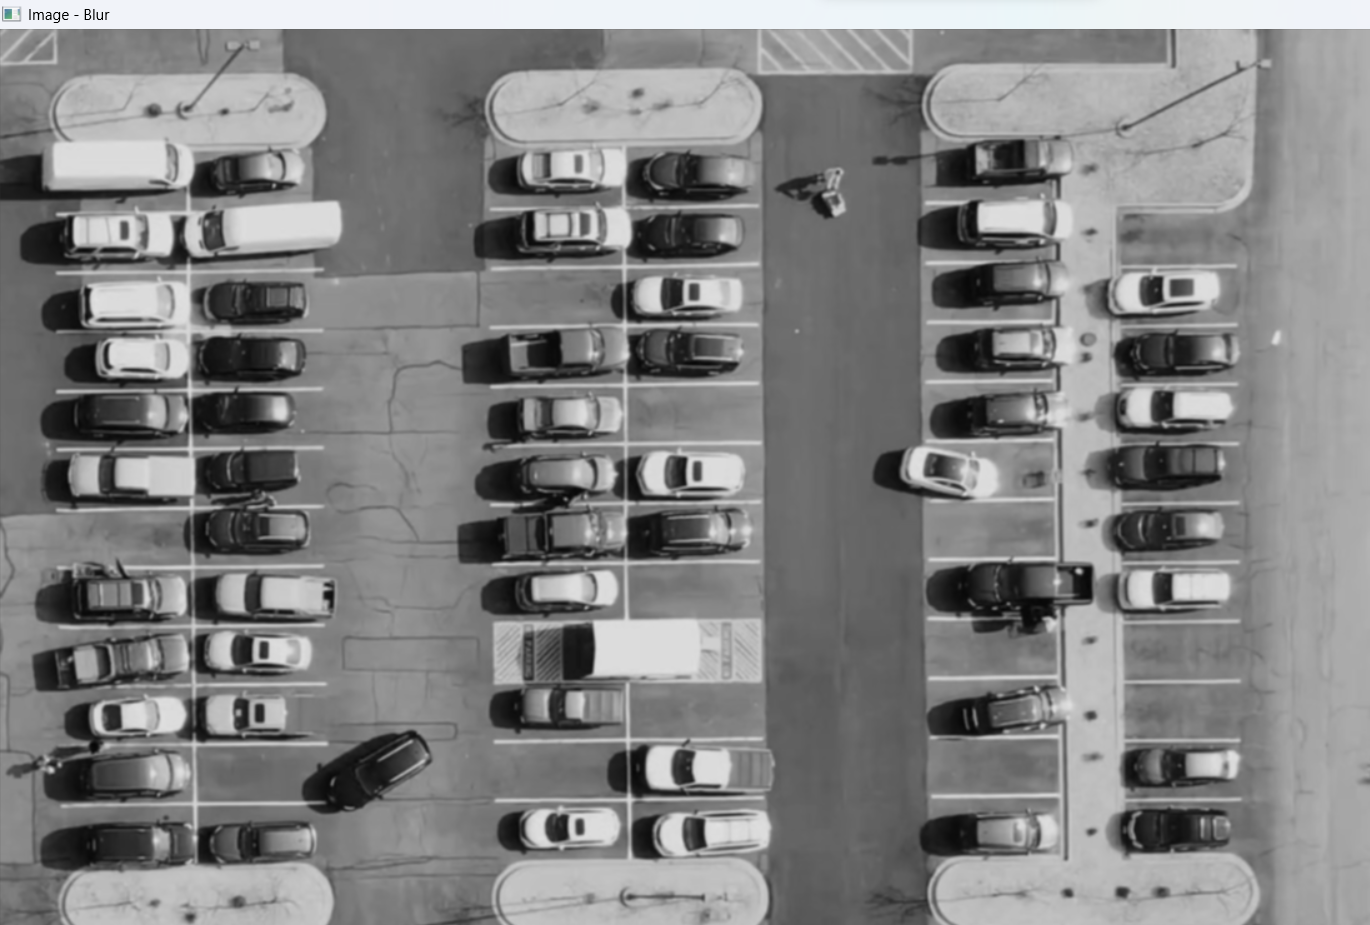

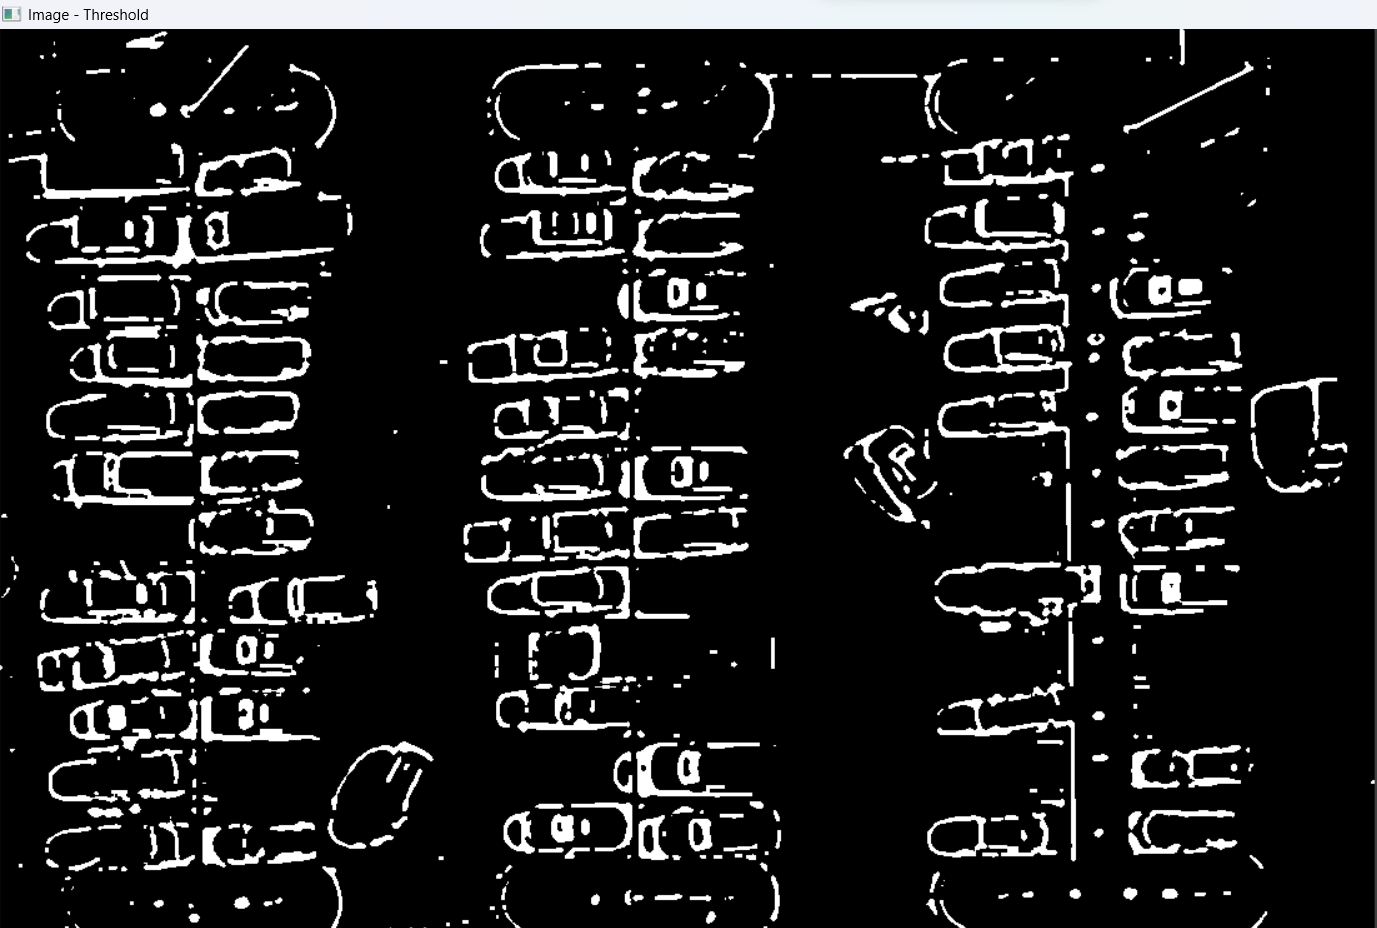

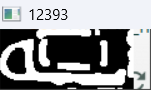

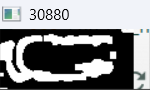

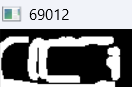

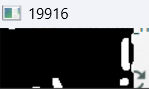

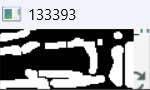

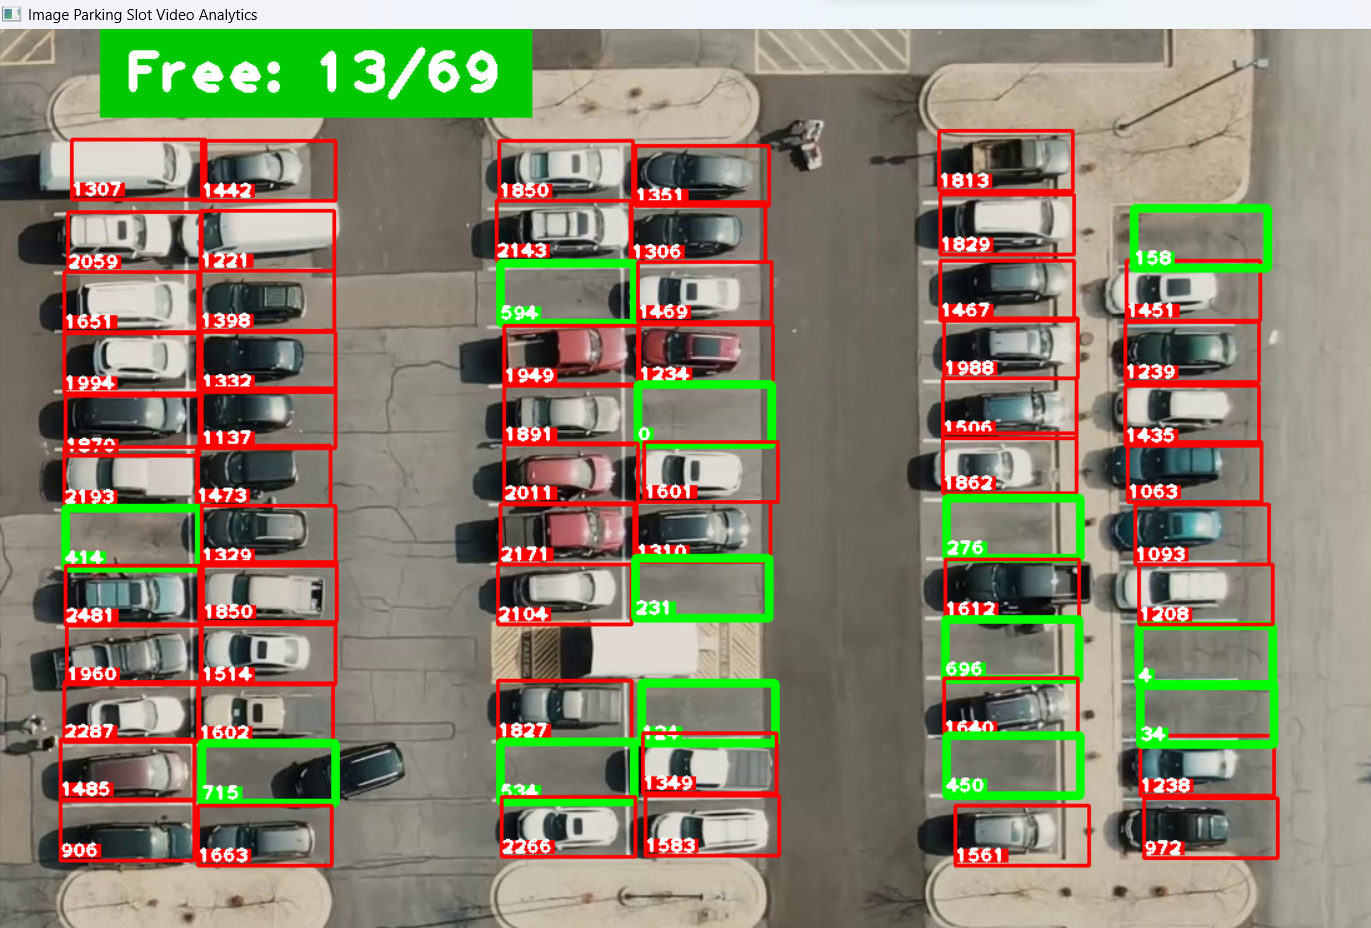

In [ ]:
import os
import zipfile

local_zip = '/content/dataset_car_or_not.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [ ]:
base_dir = '/content/dataset_car_or_not'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
train_cars_dir = os.path.join(train_dir, 'busy')
train_not_dir = os.path.join(train_dir, 'free')
validation_cars_dir = os.path.join(validation_dir, 'busy')
validation_not_dir = os.path.join(validation_dir, 'free')

In [ ]:
train_car_fnames = os.listdir(train_cars_dir)
print(train_car_fnames[:10])

train_not_fnames = os.listdir(train_not_dir)
train_not_fnames.sort()
print(train_not_fnames[:10])

['20150703_1155_11.jpg', '20150703_1805_15.jpg', '20150703_1000_29.jpg', '20150703_1115_6.jpg', '20150703_0925_51.jpg', '20150703_1235_2.jpg', '20150703_0840_15.jpg', '20150703_1705_3.jpg', '20150703_1700_38.jpg', '20150703_1055_11.jpg']
['20150703_0805_1.jpg', '20150703_0805_10.jpg', '20150703_0805_11.jpg', '20150703_0805_12.jpg', '20150703_0805_13.jpg', '20150703_0805_16.jpg', '20150703_0805_18.jpg', '20150703_0805_19.jpg', '20150703_0805_2.jpg', '20150703_0805_20.jpg']


In [ ]:
print('total training car images:', len(os.listdir(train_cars_dir)))
print('total training not car images:', len(os.listdir(train_not_dir)))
print('total validation car images:', len(os.listdir(validation_cars_dir)))
print('total validation not car images:', len(os.listdir(validation_not_dir)))

total training car images: 3621
total training not car images: 2550
total validation car images: 4781
total validation not car images: 1632


In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

nrows = 4
ncols = 4

pic_index = 0

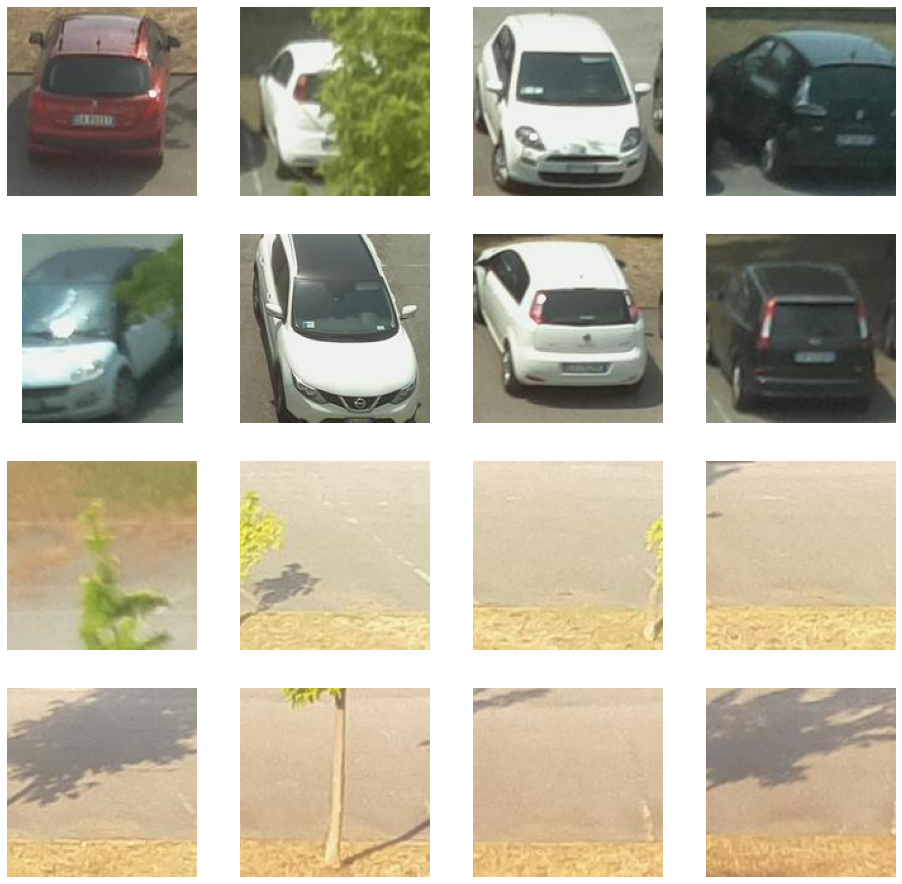

In [ ]:
# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8
next_car_pix = [os.path.join(train_cars_dir, fname) 
                for fname in train_car_fnames[pic_index-8:pic_index]]
next_not_pix = [os.path.join(train_not_dir, fname) 
                for fname in train_not_fnames[pic_index-8:pic_index]]

for i, img_path in enumerate(next_car_pix+next_not_pix):
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off')

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()


In [ ]:
from tensorflow.keras import layers
from tensorflow.keras import Model

We build a model with augmentation and without dropout:

In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,  
        target_size=(150, 150), 
        batch_size=20,
        class_mode='binary')

validation_generator = val_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

Found 6171 images belonging to 2 classes.
Found 6413 images belonging to 2 classes.


In [ ]:
from tensorflow import keras
img_input = layers.Input(shape=(150, 150, 3))

model_2 = keras.Sequential(
    [
        layers.Input(shape=(150, 150, 3)),
        layers.Conv2D(16, 3, activation='relu'),
        layers.MaxPooling2D(2),
        layers.Conv2D(32, 3, activation='relu'),
        layers.MaxPooling2D(2),
        layers.Conv2D(64, 3, activation='relu'),
        layers.MaxPooling2D(2),
        layers.Flatten(),
        layers.Dense(512, activation='relu'),
        layers.Dense(1, activation='sigmoid'),
    ]
)

model_2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 34, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 17, 17, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 18496)            

In [ ]:
from tensorflow.keras.optimizers import RMSprop

model_2.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=0.001),
              metrics=['acc'])

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [ ]:
history_2 = model_2.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=15,
      validation_data=validation_generator,
      validation_steps=50,
      verbose=2)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/15
100/100 - 11s - loss: 0.5547 - acc: 0.7565 - val_loss: 0.4453 - val_acc: 0.8300
Epoch 2/15
100/100 - 11s - loss: 0.2706 - acc: 0.8980 - val_loss: 0.4499 - val_acc: 0.7690
Epoch 3/15
100/100 - 11s - loss: 0.1704 - acc: 0.9613 - val_loss: 0.4463 - val_acc: 0.8150
Epoch 4/15
100/100 - 10s - loss: 0.1743 - acc: 0.9417 - val_loss: 0.4852 - val_acc: 0.8290
Epoch 5/15
100/100 - 11s - loss: 0.1414 - acc: 0.9550 - val_loss: 0.4944 - val_acc: 0.8370
Epoch 6/15
100/100 - 11s - loss: 0.1037 - acc: 0.9689 - val_loss: 0.4828 - val_acc: 0.8810
Epoch 7/15
100/100 - 11s - loss: 0.1035 - acc: 0.9633 - val_loss: 0.4324 - val_acc: 0.8630
Epoch 8/15
100/100 - 11s - loss: 0.0975 - acc: 0.9709 - val_loss: 0.5988 - val_acc: 0.8830
Epoch 9/15
100/100 - 11s - loss: 0.1023 - acc: 0.9710 - val_loss: 0.6951 - val_acc: 0.8700
Epoch 10/15
100/100 - 11s - loss: 0.0953 - acc: 0.9690 - val_loss: 0.6546 - val_acc: 0.8640
Epoch 11/15
100/100 - 11s - loss: 0.0713 - acc: 0.9755 - val_loss: 0.5905 - val_acc: 0.86

In [ ]:
score_2 = model_2.evaluate(validation_generator, verbose=0)
print("Test loss:", score_2[0])
print("Test accuracy:", score_2[1])

Test loss: 0.5515168309211731
Test accuracy: 0.8566973209381104


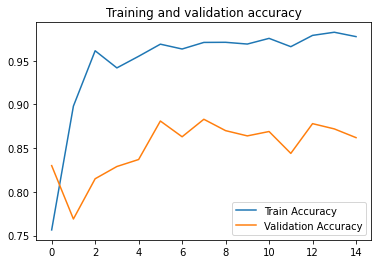

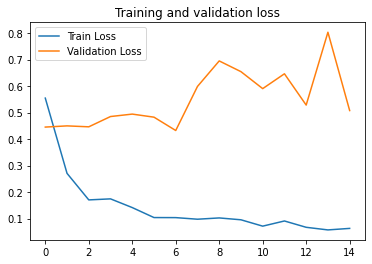

In [ ]:

acc = history_2.history['acc']
val_acc = history_2.history['val_acc']

loss = history_2.history['loss']
val_loss = history_2.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, label="Train Accuracy")
plt.plot(epochs, val_acc, label="Validation Accuracy")
plt.title('Training and validation accuracy')

plt.legend()
plt.figure()

plt.plot(epochs, loss, label="Train Loss")
plt.plot(epochs, val_loss, label="Validation Loss")
plt.title('Training and validation loss')
plt.legend()


We build a model with both dropout and augmentation:




In [ ]:

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_dir,  
        target_size=(150, 150), 
        batch_size=20,
        class_mode='binary')

validation_generator = val_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

Found 6171 images belonging to 2 classes.
Found 6413 images belonging to 2 classes.


In [ ]:
from tensorflow.keras import layers
from tensorflow.keras import Model
from tensorflow.keras.optimizers import RMSprop

from tensorflow import keras

model_4 = keras.Sequential(
    [
        layers.Input(shape=(150, 150, 3)),
        layers.Conv2D(16, 3, activation='relu'),
        layers.MaxPooling2D(2),
        layers.Conv2D(32, 3, activation='relu'),
        layers.MaxPooling2D(2),
        layers.Conv2D(64, 3, activation='relu'),
        layers.MaxPooling2D(2),
        layers.Flatten(),
        layers.Dropout(0.5), 
        layers.Dense(512, activation='relu'),
        layers.Dense(1, activation='sigmoid'),
    ]
)
model_4.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 148, 148, 16)      448       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 74, 74, 16)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 72, 72, 32)        4640      
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 36, 36, 32)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 34, 34, 64)        18496     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 17, 17, 64)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 18496)            

In [ ]:
from tensorflow.keras.optimizers import RMSprop

model_4.compile(loss='binary_crossentropy',
              optimizer=RMSprop(lr=0.001),
              metrics=['acc'])

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [ ]:
history_4 = model_4.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=15,
      validation_data=validation_generator,
      validation_steps=50,
      verbose=2)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/15
100/100 - 12s - loss: 0.6214 - acc: 0.7945 - val_loss: 0.5966 - val_acc: 0.6850
Epoch 2/15
100/100 - 11s - loss: 0.2279 - acc: 0.9145 - val_loss: 0.5055 - val_acc: 0.8140
Epoch 3/15
100/100 - 11s - loss: 0.2002 - acc: 0.9410 - val_loss: 0.5401 - val_acc: 0.8070
Epoch 4/15
100/100 - 10s - loss: 0.1261 - acc: 0.9585 - val_loss: 0.7044 - val_acc: 0.7700
Epoch 5/15
100/100 - 11s - loss: 0.1111 - acc: 0.9704 - val_loss: 0.5885 - val_acc: 0.8650
Epoch 6/15
100/100 - 11s - loss: 0.1366 - acc: 0.9635 - val_loss: 0.8468 - val_acc: 0.8150
Epoch 7/15
100/100 - 11s - loss: 0.1156 - acc: 0.9665 - val_loss: 0.7946 - val_acc: 0.8750
Epoch 8/15
100/100 - 11s - loss: 0.1575 - acc: 0.9760 - val_loss: 0.4872 - val_acc: 0.8360
Epoch 9/15
100/100 - 10s - loss: 0.1067 - acc: 0.9685 - val_loss: 0.5445 - val_acc: 0.8800
Epoch 10/15
100/100 - 10s - loss: 0.0636 - acc: 0.9760 - val_loss: 0.7443 - val_acc: 0.7750
Epoch 11/15
100/100 - 10s - loss: 0.1178 - acc: 0.9730 - val_loss: 0.4620 - val_acc: 0.89

In [ ]:
score_4 = model_4.evaluate(validation_generator, verbose=0)
print("Test loss:", score_4[0])
print("Test accuracy:", score_4[1])

Test loss: 1.2329983711242676
Test accuracy: 0.8607515692710876


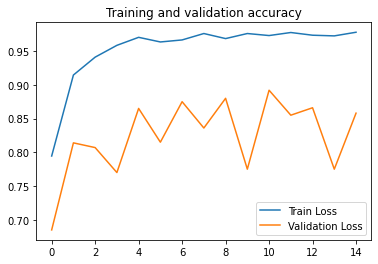

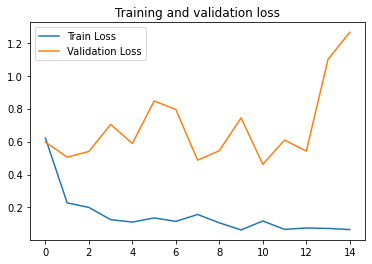

In [ ]:

acc = history_4.history['acc']
val_acc = history_4.history['val_acc']

loss = history_4.history['loss']
val_loss = history_4.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, label="Train Loss")
plt.plot(epochs, val_acc, label="Validation Loss")
plt.title('Training and validation accuracy')

plt.legend()
plt.figure()

plt.plot(epochs, loss, label="Train Loss")
plt.plot(epochs, val_loss, label="Validation Loss")
plt.title('Training and validation loss')
plt.legend()

In [ ]:
import keras,os
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D , Flatten
from keras.preprocessing.image import ImageDataGenerator
import numpy as np

In [ ]:
trdata = ImageDataGenerator()
traindata = trdata.flow_from_directory(directory="dataset_car_or_not/train",target_size=(224,224))
tsdata = ImageDataGenerator()
testdata = tsdata.flow_from_directory(directory="dataset_car_or_not/validation", target_size=(224,224))

Found 6171 images belonging to 2 classes.
Found 6413 images belonging to 2 classes.


In [ ]:
model = Sequential()
model.add(Conv2D(input_shape=(224,224,3),filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_39 (Conv2D)           (None, 224, 224, 64)      1792      
_________________________________________________________________
conv2d_40 (Conv2D)           (None, 224, 224, 64)      36928     
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 112, 112, 64)      0         
_________________________________________________________________
conv2d_41 (Conv2D)           (None, 112, 112, 128)     73856     
_________________________________________________________________
conv2d_42 (Conv2D)           (None, 112, 112, 128)     147584    
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 56, 56, 128)       0         
_________________________________________________________________
conv2d_43 (Conv2D)           (None, 56, 56, 256)      

In [ ]:
model.add(Flatten())
model.add(Dense(units=4096,activation="relu"))
model.add(Dense(units=4096,activation="relu"))
model.add(Dense(units=2, activation="softmax"))

In [ ]:
from keras.optimizers import Adam
opt = Adam(lr=0.001)
model.compile(optimizer=opt, loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_39 (Conv2D)           (None, 224, 224, 64)      1792      
_________________________________________________________________
conv2d_40 (Conv2D)           (None, 224, 224, 64)      36928     
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 112, 112, 64)      0         
_________________________________________________________________
conv2d_41 (Conv2D)           (None, 112, 112, 128)     73856     
_________________________________________________________________
conv2d_42 (Conv2D)           (None, 112, 112, 128)     147584    
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 56, 56, 128)       0         
_________________________________________________________________
conv2d_43 (Conv2D)           (None, 56, 56, 256)      

In [ ]:
from keras.callbacks import ModelCheckpoint, EarlyStopping
checkpoint = ModelCheckpoint("vgg16_1.h5",
                             monitor='val_acc',
                             verbose=1,
                             save_best_only=True,
                             save_weights_only=False,
                             mode='auto',
                             period=1)
early = EarlyStopping(monitor='val_acc',
                      min_delta=0,
                      patience=20,
                      verbose=1,
                      mode='auto')
hist = model.fit_generator(steps_per_epoch=100,
                           generator=traindata,
                           validation_data= testdata,
                           validation_steps=10,
                           epochs=100,
                           callbacks=[checkpoint,early])

Epoch 1/100


/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1915: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


100/100 [==============================] - 62s 398ms/step - loss: 201.6031 - accuracy: 0.5603 - val_loss: 0.6354 - val_accuracy: 0.7406
Epoch 2/100
100/100 [==============================] - 47s 473ms/step - loss: 0.6662 - accuracy: 0.6529 - val_loss: 0.6167 - val_accuracy: 0.7344
Epoch 3/100
100/100 [==============================] - 40s 394ms/step - loss: 0.7544 - accuracy: 0.5868 - val_loss: 0.6859 - val_accuracy: 0.5375
Epoch 4/100
100/100 [==============================] - 40s 398ms/step - loss: 0.6776 - accuracy: 0.5961 - val_loss: 0.6734 - val_accuracy: 0.7219
Epoch 5/100
100/100 [==============================] - 40s 402ms/step - loss: 0.5592 - accuracy: 0.6976 - val_loss: 0.5786 - val_accuracy: 0.7906
Epoch 6/100
100/100 [==============================] - 40s 404ms/step - loss: 0.1109 - accuracy: 0.9645 - val_loss: 0.6414 - val_accuracy: 0.8594
Epoch 7/100
100/100 [==============================] - 40s 405ms/step - loss: 0.0343 - accuracy: 0.9917 - val_loss: 0.5906 - val_accur


<h1>


We will try to get a model with VGG16 & using the imagenet with the data augmentation and the dropout layer



<h1>


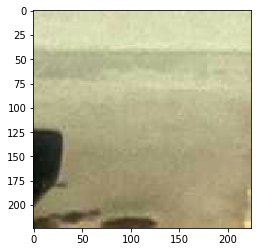

In [ ]:
from keras.preprocessing import image
from matplotlib.pyplot import imshow

fnames = [os.path.join(train_not_dir, fname) for fname in os.listdir(train_not_dir)]
img_path = fnames[1] # Choose one image to view
img = image.load_img(img_path, target_size=(224, 224)) # load image and resize it
x = image.img_to_array(img) # Convert to a Numpy array with shape (224, 224, 3)

x = x.reshape((1,) + x.shape)

plt.imshow(image.array_to_img(x[0]))

In [ ]:
from keras.applications.imagenet_utils import decode_predictions
from keras.applications import VGG16

model = VGG16(weights='imagenet', include_top=True)

features = model.predict(x)
decode_predictions(features, top=5)

In [ ]:
from keras import layers, models, optimizers

conv_base = VGG16(weights='imagenet',
                  include_top=False,
                  input_shape=(224, 224, 3))

model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

conv_base.trainable = False

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=2e-5),
              metrics=['acc'])

In [ ]:
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)
test_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224), 
    batch_size=50,
    class_mode='binary') 

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(224, 224), 
    batch_size=50,
    class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [ ]:
history = model.fit_generator(
    train_generator,
    steps_per_epoch=40,
    epochs=30,
    validation_data=validation_generator,
    validation_steps=20) 

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/30
40/40 [==============================] - 25s 624ms/step - loss: 0.3426 - acc: 0.9560 - val_loss: 0.2458 - val_acc: 0.9700
Epoch 2/30
40/40 [==============================] - 25s 624ms/step - loss: 0.2709 - acc: 0.9695 - val_loss: 0.2575 - val_acc: 0.9720
Epoch 3/30
40/40 [==============================] - 25s 630ms/step - loss: 0.1899 - acc: 0.9740 - val_loss: 0.2186 - val_acc: 0.9730
Epoch 4/30
40/40 [==============================] - 25s 630ms/step - loss: 0.1404 - acc: 0.9805 - val_loss: 0.1842 - val_acc: 0.9750
Epoch 5/30
40/40 [==============================] - 25s 629ms/step - loss: 0.1153 - acc: 0.9795 - val_loss: 0.1886 - val_acc: 0.9730
Epoch 6/30
40/40 [==============================] - 25s 628ms/step - loss: 0.0930 - acc: 0.9860 - val_loss: 0.2157 - val_acc: 0.9720
Epoch 7/30
40/40 [==============================] - 25s 627ms/step - loss: 0.0785 - acc: 0.9845 - val_loss: 0.2165 - val_acc: 0.9740
Epoch 8/30
40/40 [==============================] - 25s 628ms/step - 

In [ ]:
score = model.evaluate(validation_generator, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.21156862378120422
Test accuracy: 0.9800000190734863


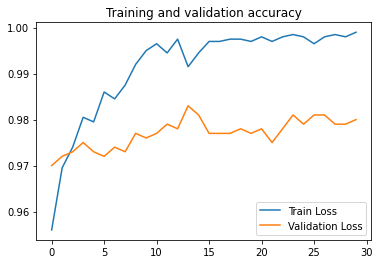

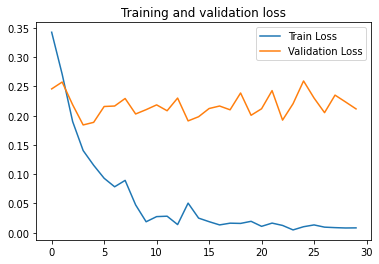

In [ ]:
# Retrieve a list of accuracy results on training and validation data
# sets for each training epoch
acc = history.history['acc']
val_acc = history.history['val_acc']

# Retrieve a list of list results on training and validation data
# sets for each training epoch
loss = history.history['loss']
val_loss = history.history['val_loss']

# Get number of epochs
epochs = range(len(acc))

# Plot training and validation accuracy per epoch
plt.plot(epochs, acc, label="Train Loss")
plt.plot(epochs, val_acc, label="Validation Loss")
plt.title('Training and validation accuracy')

plt.legend()
plt.figure()

# Plot training and validation loss per epoch
plt.plot(epochs, loss, label="Train Loss")
plt.plot(epochs, val_loss, label="Validation Loss")
plt.title('Training and validation loss')
plt.legend()

This is the best model we were able to get to!

The Test accuracy is 0.9800000190734863 and the Test loss: 0.21156862378120422 !